<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"

In [3]:
df=pd.read_csv(house_csv)

In [4]:
df.iloc[3]

street                   2805 JANETTE WAY
city                           SACRAMENTO
zip                                 95815
state                                  CA
beds                                    2
baths                                   1
sq__ft                                852
type                          Residential
sale_date    Wed May 21 00:00:00 EDT 2008
price                               69307
latitude                        38.616835
longitude                     -121.439146
Name: 3, dtype: object

In [5]:
df.loc[3]

street                   2805 JANETTE WAY
city                           SACRAMENTO
zip                                 95815
state                                  CA
beds                                    2
baths                                   1
sq__ft                                852
type                          Residential
sale_date    Wed May 21 00:00:00 EDT 2008
price                               69307
latitude                        38.616835
longitude                     -121.439146
Name: 3, dtype: object

In [6]:
# df.index = df.index +10
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [7]:
# Dataset is complete
# Zip code is numerical (should be string)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
# There are several houses without beds, bath or sqft
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


/Users/lukebennett/Documents/institute_of_data/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


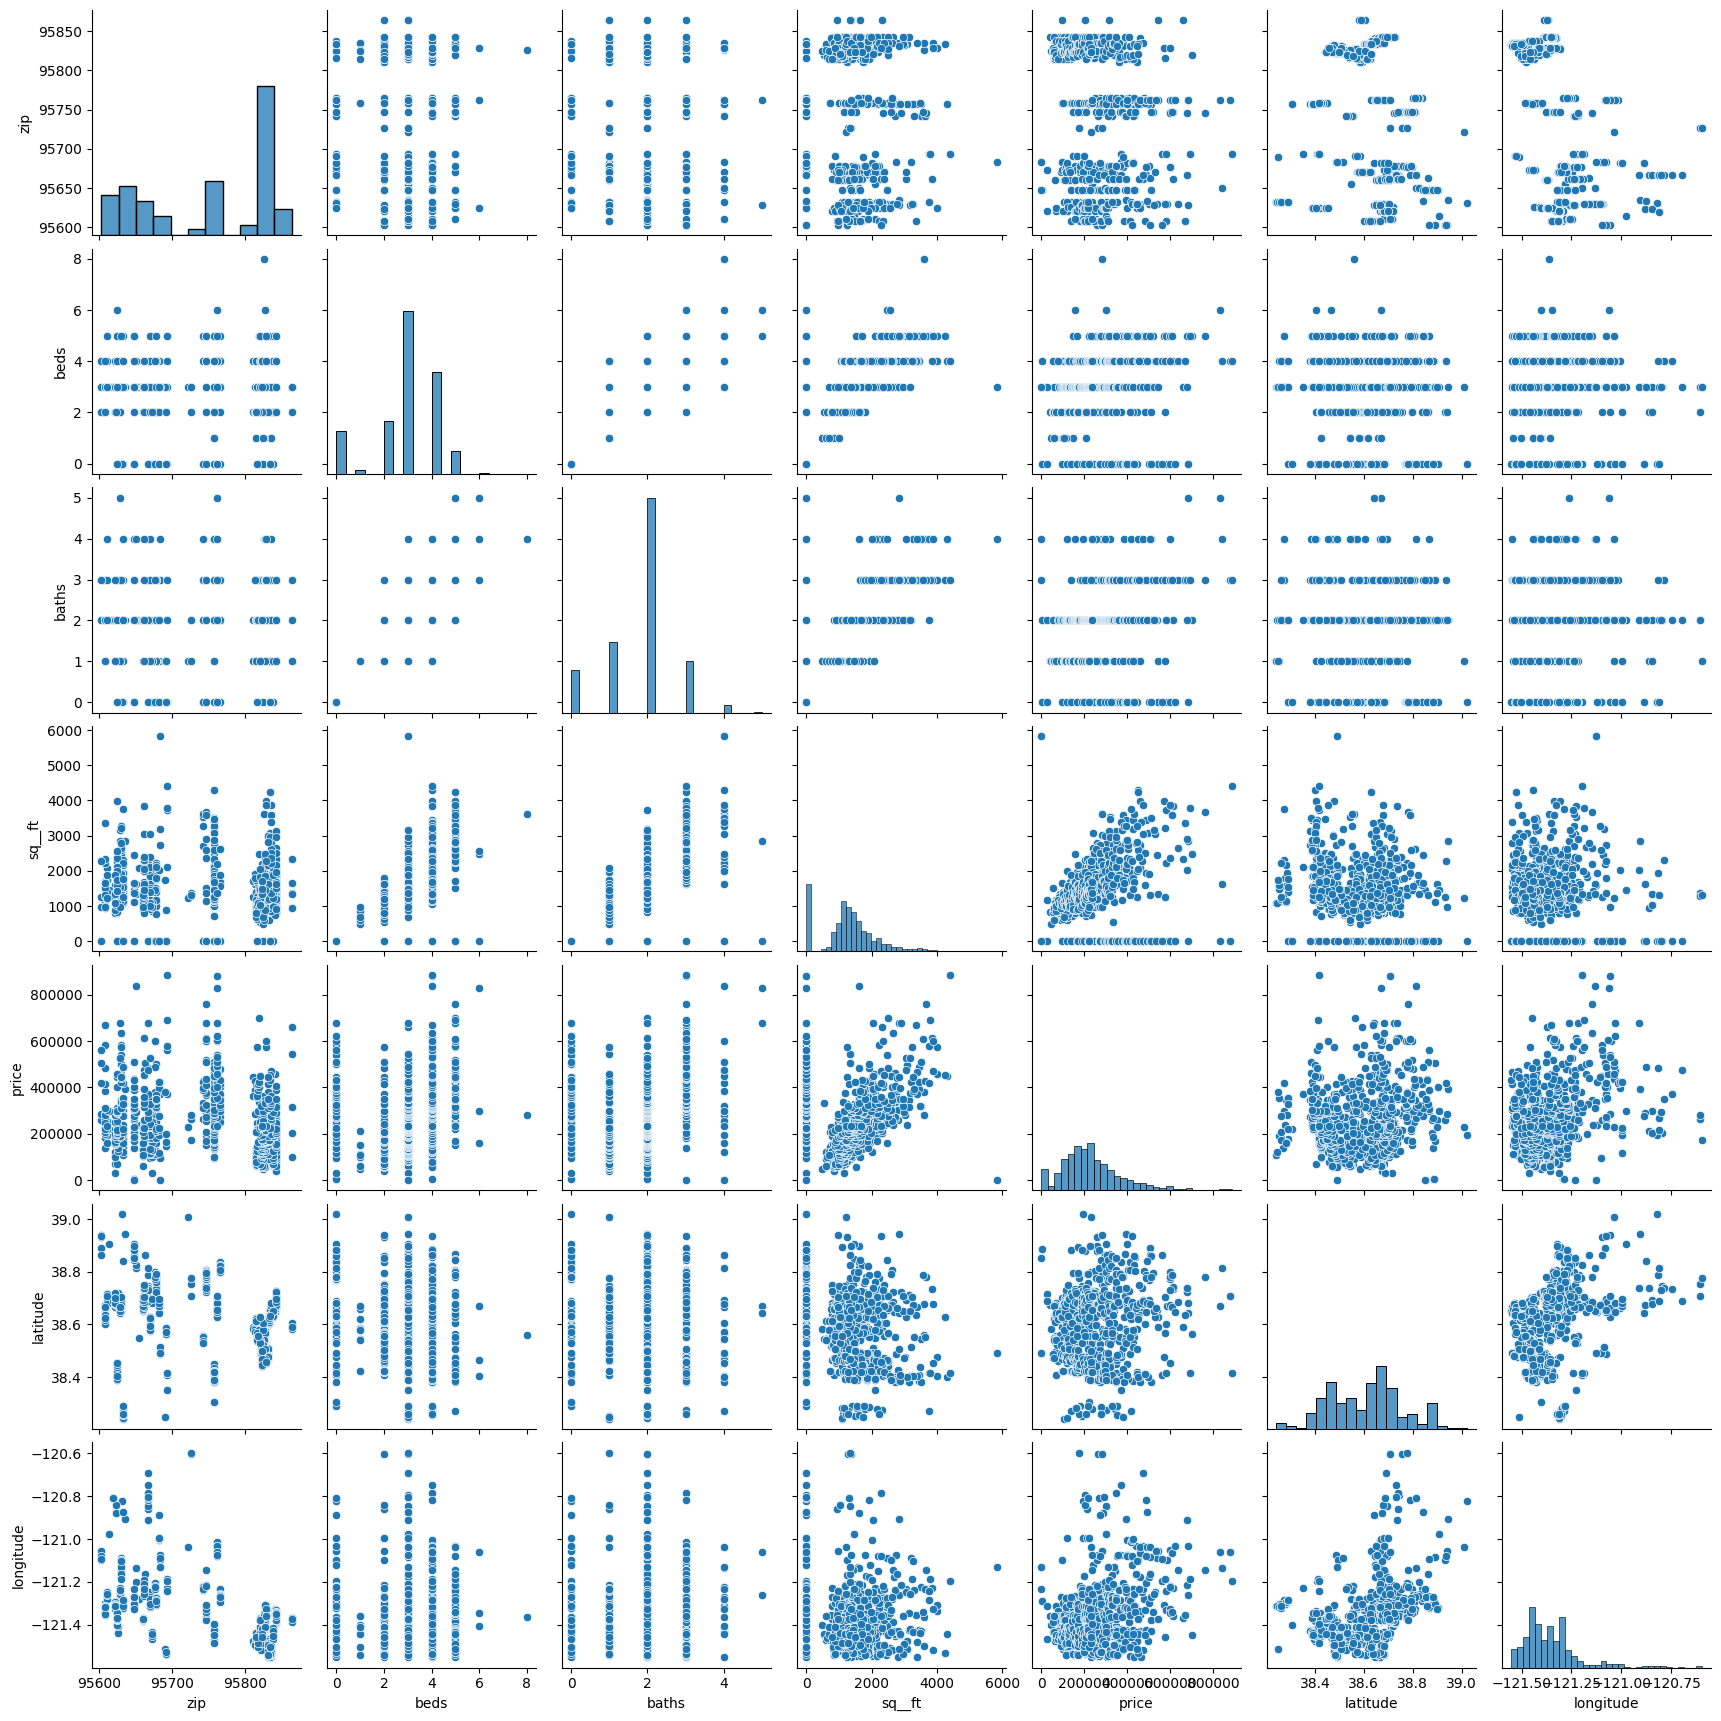

In [9]:
sns.pairplot(df)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [10]:
# ANSWER
df=pd.read_csv(house_csv)

# Price - We would likely want to predict the house price based on the predictive values

#### 2.2 List all possible variables which might be Predictor variable.

In [11]:
# ANSWER
# The following 3 may be a bit redundant and have similar feature sets. Might be worth exploring	
# beds
# baths
# sq__ft
# type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<Axes: >

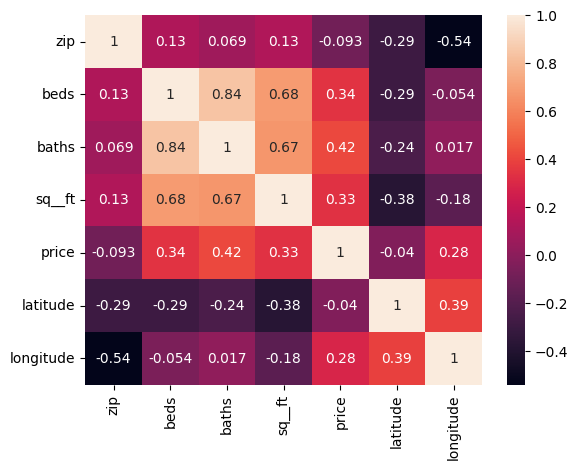

In [12]:
# ANSWER
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [79]:
# ANSWER

# Take the mean of the houses and assume all houses have the average price
df["yhat"] = df["price"].mean()


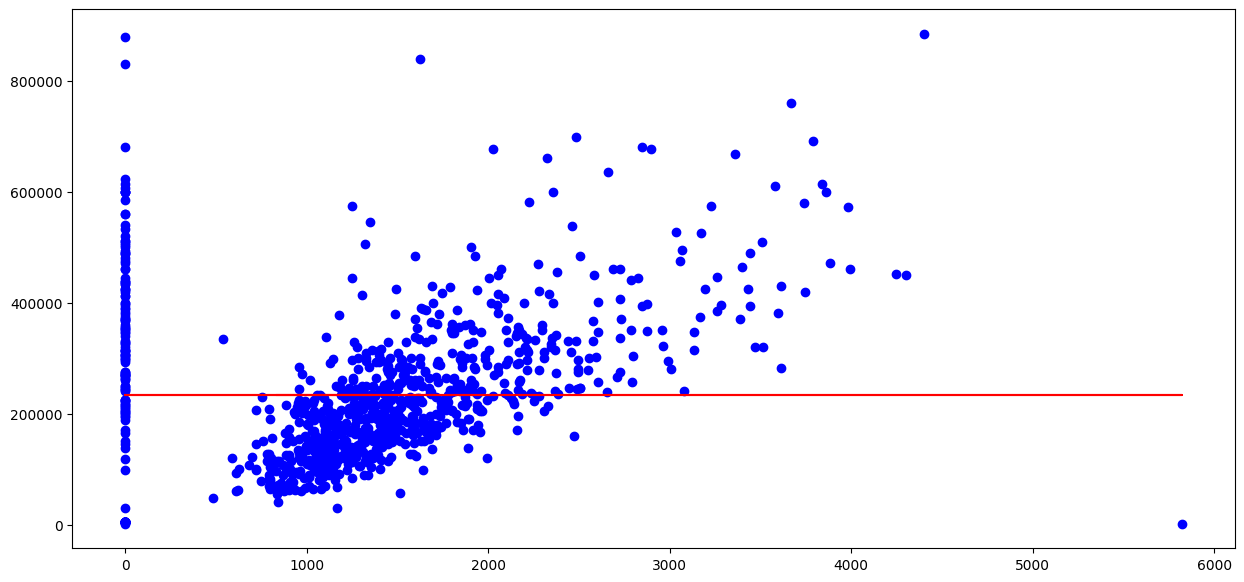

In [80]:
import matplotlib.pyplot as plt
X = df['sq__ft']
Y = df['price']
Yhat = df["yhat"]

def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [132]:
# ANSWER

(df["price"] - predicted_price).abs().mean()

103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [133]:
# ANSWER
X = df["sq__ft"]
y = df["price"]

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [134]:
# ANSWER

In [143]:
x_less_mean = (X - X.mean())
y_less_mean = (y - y.mean())
b1 = (y_less_mean * x_less_mean).sum() / (x_less_mean ** 2).sum()

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [158]:
# ANSWER
b0 = y.mean() - (b1 * X.mean())
b0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [159]:
# ANSWER
y_pred = b0 + (b1 * X)


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [162]:
# ANSWER
residuals = y - y_pred
residuals

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [184]:
# ANSWER
def r2(y_true, y_pred):
    ss_total = ((y_true - y_true.mean()) ** 2).sum()
    ss_res = ((y_true - y_pred) ** 2).sum()
    return 1 - (ss_res / ss_total)
    
r2(y, y_pred)

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [186]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

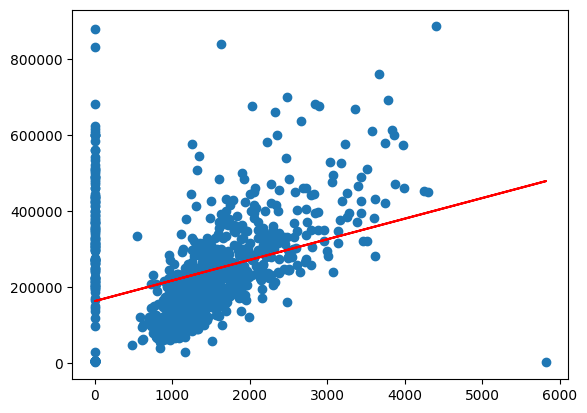

In [193]:
# ANSWER
plt.scatter(df["sq__ft"], df["price"])
plt.plot(df["sq__ft"], y_pred, c="r")

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [190]:
# ANSWER
x_sample = 1204
prediction = b0 + b1 * x_sample
prediction

228137.1635919888



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



